In [73]:
import pandas as pd

df = pd.read_csv("fct_invoice.csv")
df

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...
99452,I219422,2344,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,172,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,425,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,577,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [3]:
df.columns


Index(['invoice_no', 'customer_id', 'category', 'quantity', 'price',
       'payment_method', 'invoice_date', 'shopping_mall'],
      dtype='object')

<span style="font-size:25pt;">Easy 1</span>

In [38]:
unique_customers = df["customer_id"].unique()

print(len(unique_customers))

5191


<span style="font-size:25pt;">Easy 2</span>

In [40]:
unique_category = df["category"].unique()
print(unique_category)
print(len(unique_category))

['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']
8


<span style="font-size:25pt;">Easy 3</span>

In [60]:
frequent_payment = df["payment_method"].value_counts()
print(frequent_payment.head(1))

Cash    44447
Name: payment_method, dtype: int64


<span style="font-size:25pt;">Medium 1</span>

In [82]:
df["total_sales"] = df["quantity"] * df["price"]
category_sales = df.groupby("category")["total_sales"].sum()
ranked_sales = category_sales.nlargest(3)
print(ranked_sales)

category
Clothing      1.139968e+08
Shoes         6.655345e+07
Technology    5.786235e+07
Name: total_sales, dtype: float64


<span style="font-size:25pt;">Medium 2</span>

In [88]:
json = pd.read_json("dim_customer.json")

json.columns

Index(['age', 'first_name', 'gender', 'id', 'last_name'], dtype='object')

In [91]:
json.rename(columns ={"id": "customer_id"}, inplace=True)
merged_df = pd.merge(json,df,on="customer_id")
merged_df

,age,first_name,gender,customer_id,last_name,invoice_no,category,quantity,price,payment_method,invoice_date,shopping_mall,total_sales
0,48.0,Nicholas,M,0,Flores,I254078,Shoes,3,1800.51,Cash,28/05/2021,Kanyon,5401.53
1,48.0,Nicholas,M,0,Flores,I387354,Shoes,1,600.17,Cash,7/4/2021,Kanyon,600.17
2,48.0,Nicholas,M,0,Flores,I170558,Cosmetics,2,81.32,Cash,13/02/2021,Metropol AVM,162.64
3,48.0,Nicholas,M,0,Flores,I187874,Books,4,60.60,Cash,21/01/2023,Mall of Istanbul,242.40
4,48.0,Nicholas,M,0,Flores,I171870,Toys,3,107.52,Credit Card,1/8/2022,Istinye Park,322.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99452,NaN,Arthur,M,9428,Harris,I216403,Cosmetics,5,203.30,Debit Card,4/7/2021,Mall of Istanbul,1016.50
99453,NaN,David,M,9494,Roy,I203211,Cosmetics,1,40.66,Debit Card,9/7/2022,Metrocity,40.66
99454,85.0,Thomas,M,10350,Turner,I325731,Cosmetics,2,81.32,Cash,7/4/2021,Cevahir AVM,162.64
99455,NaN,April,F,10587,Sanchez,I478078,Clothing,5,1500.40,Credit Card,20/10/2022,Metrocity,7502.00


In [94]:
merged_df.columns

Index(['age', 'first_name', 'gender', 'customer_id', 'last_name', 'invoice_no',
       'category', 'quantity', 'price', 'payment_method', 'invoice_date',
       'shopping_mall', 'total_sales'],
      dtype='object')

In [105]:
filtered_age_data = merged_df[merged_df["age"] > 45]
filtered_age_data["total_sales"].sum()

82039768.14999999

<span style="font-size:25pt;">Medium 3</span>

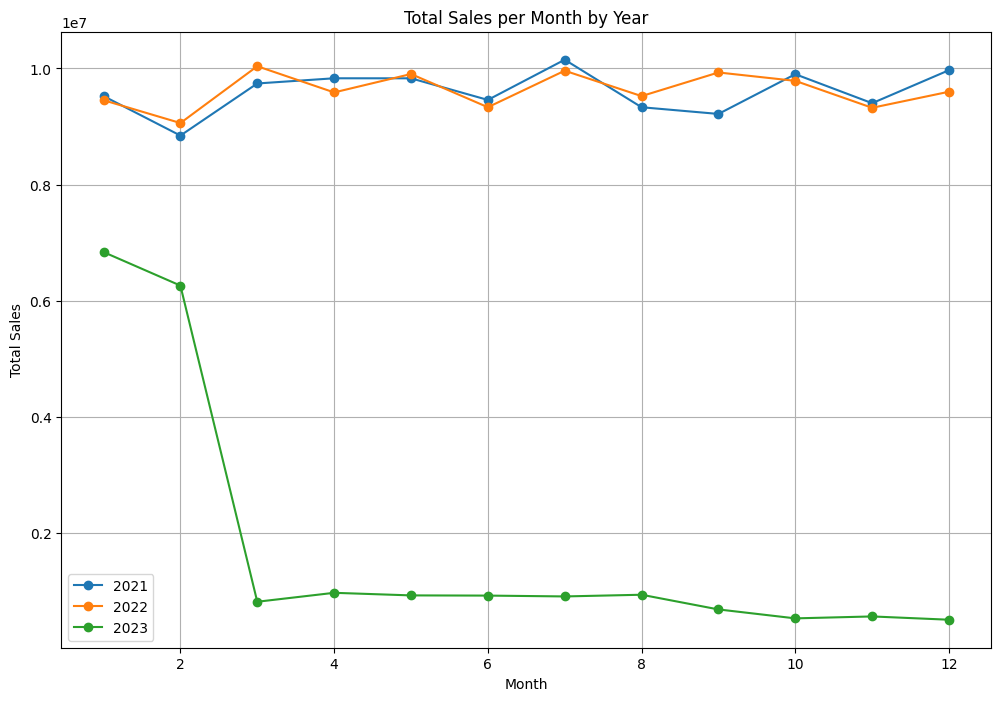

In [162]:
import matplotlib.pyplot as plt

merged_df["invoice_date"] = pd.to_datetime(merged_df["invoice_date"])
merged_df["month"] = merged_df["invoice_date"].dt.month
merged_df["year"] = merged_df["invoice_date"].dt.year

plt.figure(figsize=(12, 8))

unique_years = merged_df["year"].unique()
sorted_years = sorted(unique_years)

for year in sorted_years:
    year_data = merged_df[merged_df["year"] == year]
    monthly_sales = year_data.groupby("month")["total_sales"].sum()
    plt.plot(monthly_sales.index, monthly_sales, marker='o', label=str(year))

plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.title("Total Sales per Month by Year")
plt.legend()
plt.grid(True)
plt.show()


<span style="font-size:larger;">Sales are high during March, July, October, and December</span>

<span style="font-size:larger;">Sales are low during February, June, and November</span>

<span style="font-size:25pt;">Hard 1</span>

In [199]:
bins = [0,10,20,30,40,50,60,70,80,90]

merged_df["age_range"] = pd.cut(merged_df["age"], bins = bins, right = False, labels =["0-9","10-19","20-29","30-39","40-49","50-59","60-69","70-79","80-89"])
pivot_table = merged_df.pivot_table(values="total_sales", index="age_range", columns='category', aggfunc='sum')
pivot_table

category,Books,Clothing,Cosmetics,Food & Beverage,Shoes,Souvenir,Technology,Toys
age_range,,,,,,,,
0-9,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00
10-19,12801.75,1927413.84,109619.36,13582.31,993281.35,12375.15,1129800.0,60426.24
20-29,79461.75,10250732.80,605915.32,73491.96,5924878.24,54943.32,5261550.0,385100.80
30-39,84143.10,11354126.96,723544.70,87246.86,7200839.66,64092.72,6159300.0,420582.40
40-49,87203.40,11215189.92,665034.96,89553.29,7025590.02,66391.80,5954550.0,390906.88
50-59,74962.20,10321851.76,587780.96,72425.04,5852857.84,54943.32,4435200.0,345067.52
60-69,80476.80,10660642.08,649990.76,80976.09,5978893.54,55025.43,5471550.0,363955.20
70-79,54827.85,7769371.28,419082.62,55050.98,4480269.05,38673.81,3638250.0,273244.16
80-89,26664.00,4493698.00,254531.60,31332.93,2628744.60,23718.06,1946700.0,153932.80
